# Disable GPU (if needed)

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
%matplotlib inline
import matplotlib.pyplot as plt

# Keras API

In [2]:
from tensorflow.keras.layers import Activation, Conv2D, Input
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.models import Model

def model_build_func(input_shape):
    activation = 'linear'
    padding='same'
    
    inp = Input(shape=input_shape, name='input_image')
    x = Conv2D(32, (5, 5), padding=padding, activation=activation)(inp)
    x = Conv2D(32, (3, 3), padding=padding, activation=activation)(x)
    x = AvgPool2D()(x)
    x = Conv2D(64, (3, 3), activation=activation, padding=padding)(x)
    x = Conv2D(64, (3, 3), activation=activation, padding=padding, name='feature_map0')(x)
    x = AvgPool2D()(x)
    x = Conv2D(128, (3, 3), activation=activation, padding=padding)(x)
    x = Conv2D(128, (3, 3), activation=activation, padding=padding, name='feature_map1')(x)

    model = Model(inp, x)
    return model
# check model
model = model_build_func(input_shape=(96, 96, 3))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
feature_map0 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 24, 24, 64)        0     

## Load example image

In [3]:
from receptivefield.image import get_default_image

image = get_default_image(shape=(32, 32), tile_factor=1)
image.shape

(96, 96, 3)

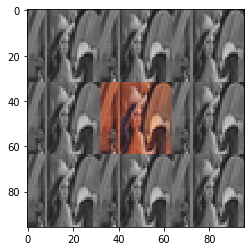

In [4]:
plt.imshow(image)
plt.savefig("../img/demo_keras_lena.jpg", dpi=126)

## Compute RF params for that network

In [5]:
from receptivefield.keras import KerasReceptiveField

rf = KerasReceptiveField(model_build_func, init_weights=False)

rf_params = rf.compute(
    input_shape=image.shape, 
    input_layer='input_image', 
    output_layers=['feature_map0', 'feature_map1']
)
rf_params

[2019-12-11 19:52:01,314][ INFO][keras.py]::Feature maps shape: [[None, 48, 48, 1], [None, 24, 24, 1]]
[2019-12-11 19:52:01,314][ INFO][keras.py]::Input shape       : (None, 96, 96, 3)
[2019-12-11 19:52:01,675][ INFO][base.py]::Estimated receptive field for feature map [0]: ReceptiveFieldDescription(offset=(1.0, 1.0), stride=(2.0, 2.0), size=Size(w=16, h=16))
[2019-12-11 19:52:01,676][ INFO][base.py]::Estimated receptive field for feature map [1]: ReceptiveFieldDescription(offset=(2.0, 2.0), stride=(4.0, 4.0), size=Size(w=34, h=34))


[FeatureMapDescription(size=Size(w=48, h=48), rf=ReceptiveFieldDescription(offset=(1.0, 1.0), stride=(2.0, 2.0), size=Size(w=16, h=16))),
 FeatureMapDescription(size=Size(w=24, h=24), rf=ReceptiveFieldDescription(offset=(2.0, 2.0), stride=(4.0, 4.0), size=Size(w=34, h=34)))]

In [6]:
rf.feature_maps_desc

[FeatureMapDescription(size=Size(w=48, h=48), rf=ReceptiveFieldDescription(offset=(1.0, 1.0), stride=(2.0, 2.0), size=Size(w=16, h=16))),
 FeatureMapDescription(size=Size(w=24, h=24), rf=ReceptiveFieldDescription(offset=(2.0, 2.0), stride=(4.0, 4.0), size=Size(w=34, h=34)))]

## Plot example receptive field response

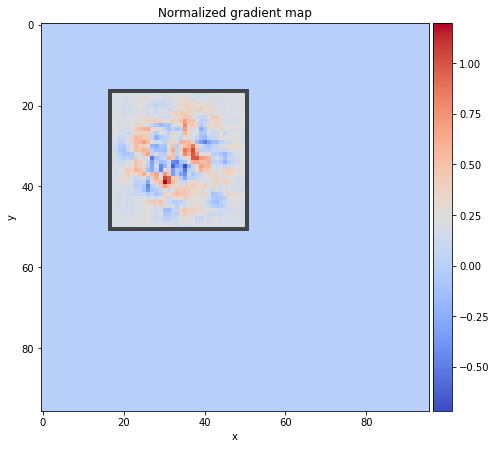

In [7]:
rf.plot_gradient_at(fm_id=1, point=(8, 8), image=None, figsize=(7, 7))
plt.savefig("../img/demo_keras_response.jpg", dpi=128)

## Debug receptive field

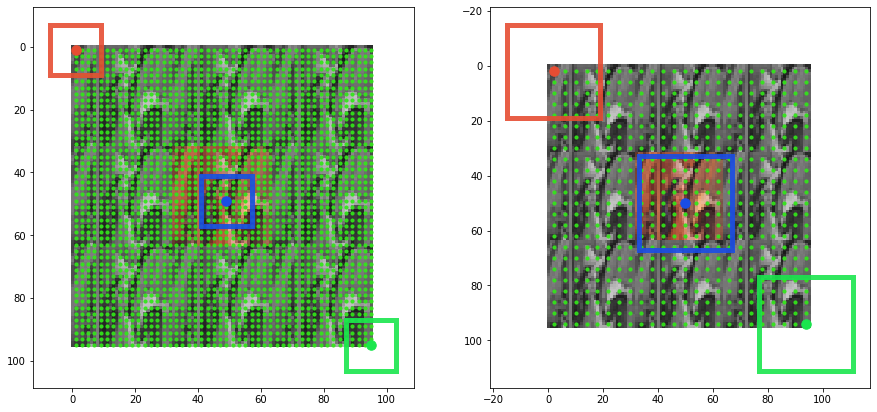

In [8]:
rf.plot_rf_grids(custom_image=image, figsize=(15, 12), layout=(1, 2))
plt.savefig("../img/demo_keras_rf_debug.jpg", dpi=128, bbox_inches='tight')